## How Much of the World Has Access to the Internet?

Now let's now move on to the competition and challenge.

## 📖 Background
You work for a policy consulting firm. One of the firm's principals is preparing to give a presentation on the state of internet access in the world. She needs your help answering some questions about internet accessibility across the world.

## 💾 The data

#### The research team compiled the following tables ([source](https://ourworldindata.org/internet)):

#### internet
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

#### people
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

#### broadband
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1998 to 2020.
- "Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.

_**Acknowledgments**: Max Roser, Hannah Ritchie, and Esteban Ortiz-Ospina (2015) - "Internet." OurWorldInData.org._

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the top 5 countries with the highest internet use (by population share)?
2. How many people had internet access in those countries in 2019?
3. What are the top 5 countries with the highest internet use for each of the following regions:  'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia'?
4. Create a visualization for those five regions' internet usage over time.
5. What are the 5 countries with the most internet users?
6. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?
7. Summarize your findings.

_Note:  [This](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups) is how the World Bank defines the different regions._

## 🧑‍⚖️ Judging criteria  

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Response quality** | 85%       | <ul><li> Accuracy (30%) - The response must be representative of the original data and free from errors.</li><li> Clarity (25%) - The response must be easy to understand and clearly expressed.</li><li> Completeness (30%) - The response must be a full report that responds to the question posed.</li></ul>       |
| **Presentation** | 15% | <ul><li>How legible/understandable the response is.</li><li>How well-formatted the response is.</li><li>Spelling and grammar.</li></ul> |

In the event of a tie, earlier submission time will be used as a tie-breaker. 

## ⌛️ Time is ticking. Good luck!

<h1>Cleaning the dataset </h1>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading data
def load_data(data_name):
    path = f"/Users/kpaul/OneDrive/code/github/Project/data_analysis/How Much of the World Has Access to the Internet/data/{data_name}.csv"
    return pd.read_csv(path)


broadband = load_data('broadband')
internet = load_data('internet')
people = load_data('people')

In [3]:
#first look on the dataframes

print('broadband:\n', broadband)
print('internet:\n', internet)
print('people:\n', people)

broadband:
            Entity Code  Year  Broadband_Subscriptions
0     Afghanistan  AFG  2004                 0.000809
1     Afghanistan  AFG  2005                 0.000858
2     Afghanistan  AFG  2006                 0.001892
3     Afghanistan  AFG  2007                 0.001845
4     Afghanistan  AFG  2008                 0.001804
...           ...  ...   ...                      ...
3883     Zimbabwe  ZWE  2016                 1.217633
3884     Zimbabwe  ZWE  2017                 1.315694
3885     Zimbabwe  ZWE  2018                 1.406322
3886     Zimbabwe  ZWE  2019                 1.395818
3887     Zimbabwe  ZWE  2020                 1.368916

[3888 rows x 4 columns]
internet:
            Entity Code  Year  Internet_Usage
0     Afghanistan  AFG  1990        0.000000
1     Afghanistan  AFG  1991        0.000000
2     Afghanistan  AFG  1992        0.000000
3     Afghanistan  AFG  1993        0.000000
4     Afghanistan  AFG  1994        0.000000
...           ...  ...   ...      

In [4]:
# check na values
data_frames = [broadband, internet, people]

def count_na_values(data_frames):
    for df in data_frames:
        display( round(df.isnull().sum()/ len(df) * 100 , 2))
count_na_values(data_frames)

Entity                     0.00
Code                       6.97
Year                       0.00
Broadband_Subscriptions    0.00
dtype: float64

Entity             0.00
Code              18.73
Year               0.00
Internet_Usage     0.00
dtype: float64

Entity    0.00
Code      4.81
Year      0.00
Users     0.00
dtype: float64

In [5]:
# #dropind na values 
for df in data_frames:
    df = df.dropna(inplace=True)
count_na_values(data_frames)

Entity                     0.0
Code                       0.0
Year                       0.0
Broadband_Subscriptions    0.0
dtype: float64

Entity            0.0
Code              0.0
Year              0.0
Internet_Usage    0.0
dtype: float64

Entity    0.0
Code      0.0
Year      0.0
Users     0.0
dtype: float64

In [6]:
# #reset all index
for df in data_frames:
    df = df.reset_index(drop = True)


<h1>1. What are the top 5 countries with the highest internet use (by population share)?</h1>
To answer this question we will join the internet and people dataset and work with the inner observations

In [7]:
internet

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,1991,0.000000
2,Afghanistan,AFG,1992,0.000000
3,Afghanistan,AFG,1993,0.000000
4,Afghanistan,AFG,1994,0.000000
...,...,...,...,...
7084,Zimbabwe,ZWE,2013,15.500000
7085,Zimbabwe,ZWE,2014,16.364740
7086,Zimbabwe,ZWE,2015,22.742818
7087,Zimbabwe,ZWE,2016,23.119989


In [8]:
internet.describe()

,Year,Internet_Usage
count,5761.000000,5761.000000
mean,2003.897587,21.885986
std,8.370040,28.373667
min,1990.000000,0.000000
25%,1997.000000,0.145811
50%,2004.000000,6.150000
75%,2011.000000,38.380000
max,2019.000000,99.701504


In [9]:
internet_top5 = internet.groupby('Entity')['Internet_Usage'].agg([np.sum, np.mean, np.median]).sort_values('median',ascending=False)
internet_top5.head(6)

,sum,mean,median
Entity,,,
Kosovo,173.336629,86.668314,86.668314
Iceland,1806.512910,62.293549,83.880000
Sweden,1718.799370,59.268944,82.010000
Denmark,1753.807290,58.460243,81.835000
Norway,1855.540181,61.851339,80.060000
Netherlands,1735.916862,57.863895,74.760000


#### Observations:
- Kosovo was only independant in 2017 só its will be more interessant focus only on the others leaders : Iceland, Sweden, Denmark, Norway, Netthlands

In [10]:
Kosovo = internet[internet['Entity'] == 'Kosovo']
Kosovo

,Entity,Code,Year,Internet_Usage
3385,Kosovo,OWID_KOS,2017,83.893597
3386,Kosovo,OWID_KOS,2018,89.443032


In [11]:
# exploring the others leaders without Kosovo
top_leaders = ['Iceland', 'Sweden', 'Denmark', 'Norway', 'Netherlands']
internet[(internet['Entity'].isin(top_leaders)) & (internet['Year'] == 1990)]

,Entity,Code,Year,Internet_Usage
1523,Denmark,DNK,1990,0.097277
2988,Iceland,ISL,1990,0.000000
4608,Netherlands,NLD,1990,0.334387
4862,Norway,NOR,1990,0.707299
6248,Sweden,SWE,1990,0.584192


In [12]:
top5_internet_user = internet[internet['Entity'] != 'Kosovo'].groupby('Entity')[['Internet_Usage']].agg(np.median).sort_values('Internet_Usage', ascending=False).head(5)
top5_internet_user

,Internet_Usage
Entity,
Iceland,83.880
Sweden,82.010
Denmark,81.835
Norway,80.060
Netherlands,74.760


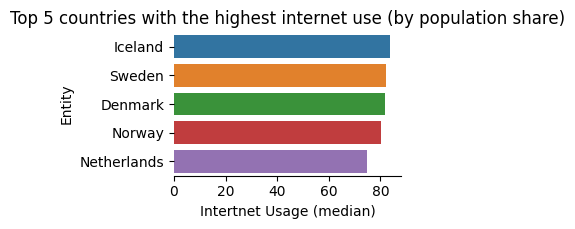

In [13]:

def top5_graph(subplot ,data , x , y , title , xlab):
    fig, ax = plt.subplots(figsize=(15,10))
    fig.tight_layout(pad=5)
    ax = plt.subplot(5,5, subplot)
    sns.barplot(data= data, x = x, y = y )
    plt.title(title)
    sns.despine(bottom=False, left=True)
    plt.xlabel(xlab)
    plt.show()
    return None
    
top5_graph(1 ,top5_internet_user, 'Internet_Usage' , top5_internet_user.index, 'Top 5 countries with the highest internet use (by population share)' , 'Intertnet Usage (median)')


## 2. How many people had internet access in those countries in 2019?

In [14]:
people

,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0
...,...,...,...,...
6374,Zimbabwe,ZWE,2016,3341464
6375,Zimbabwe,ZWE,2017,3599269
6376,Zimbabwe,ZWE,2018,3763048
6377,Zimbabwe,ZWE,2019,3854006


In [15]:
top_leaders

['Iceland', 'Sweden', 'Denmark', 'Norway', 'Netherlands']

In [16]:
most_internet_acces_2019 = people[(people['Entity'].isin(top_leaders)) & (people['Year'] == 2019)].nlargest(5, 'Users')

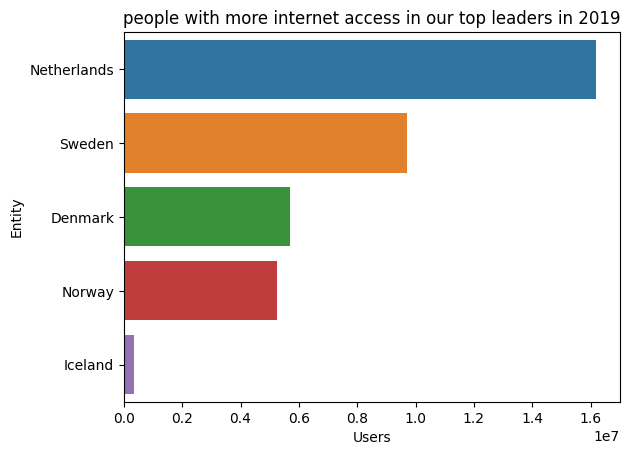

In [17]:
sns.barplot(data=most_internet_acces_2019, x = 'Users', y = 'Entity' )
plt.title('people with more internet access in our top leaders in 2019')
plt.show()

In [18]:
# data = people[(people['Entity'].isin(top_leaders)) & (people['Year'] == 2019)].nlargest(5, 'Users')['Users']
# keys = ['Netherlands', 'Sweden', 'Denmark', 'Norway', 'Iceland' ]
  
# # declaring exploding pie
# explode = [0.1, 0, 0, 0, 0]
# # define Seaborn color palette to use
# palette_color = sns.color_palette('dark')
  
# # plotting data on chart
# plt.pie(data, labels=keys, colors=palette_color,
#         explode=explode, autopct='%.0f%%')
  
# # displaying chart
# plt.show()

### Observations
We can conclude that out of the 5 countries that used the most internet from 1990 to 2019, the Netherlands had many more people who had internet access.

## 3. What are the top 5 countries with the highest internet use for each of the following regions:  'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia'?

In [19]:
world_bank_data = pd.read_excel('/Users/kpaul/OneDrive/code/github/Project/data_analysis/How Much of the World Has Access to the Internet/data/CLASS.xlsx', sheet_name=1)
world_bank_data

,GroupCode,GroupName,CountryCode,CountryName
0,ARB,Arab World,ARE,United Arab Emirates
1,ARB,Arab World,BHR,Bahrain
2,ARB,Arab World,COM,Comoros
3,ARB,Arab World,DJI,Djibouti
4,ARB,Arab World,DZA,Algeria
...,...,...,...,...
2141,ECA,Europe & Central Asia (excluding high income),XKX,Kosovo
2142,MNA,Middle East & North Africa (excluding high inc...,YEM,"Yemen, Rep."
2143,SSA,Sub-Saharan Africa (excluding high income),ZAF,South Africa
2144,SSA,Sub-Saharan Africa (excluding high income),ZMB,Zambia


In [20]:
world_bank_data['GroupName'].unique()

array(['Arab World', 'Central Europe and the Baltics',
       'Caribbean small states', 'Early-demographic dividend',
       'East Asia & Pacific', 'Europe & Central Asia', 'Euro area',
       'European Union', 'Heavily indebted poor countries (HIPC)',
       'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend',
       'IDA only', 'Latin America & Caribbean',
       'Least developed countries: UN classification',
       'Late-demographic dividend', 'Middle East & North Africa',
       'North America', 'OECD members', 'Other small states',
       'Pre-demographic dividend', 'Pacific island small states',
       'Post-demographic dividend', 'South Asia', 'Sub-Saharan Africa',
       'Small states', 'East Asia & Pacific (IDA & IBRD)',
       'Europe & Central Asia (IDA & IBRD)',
       'Latin America & Caribbean (IDA & IBRD)',
       'Middle East & North Africa (IDA & IBRD)',
       'South Asia (IDA & IBRD)', 'Sub-Saharan Africa (IDA & IBRD)',
       'World', 'Africa Eastern and Sout

In [21]:
africa_es = world_bank_data[world_bank_data['GroupName'] == 'Africa Eastern and Southern'][['CountryCode','CountryName','GroupName']]
africa_wc = world_bank_data[world_bank_data['GroupName'] == 'Africa Western and Central'][['CountryCode','CountryName','GroupName']]
latam_car = world_bank_data[world_bank_data['GroupName'] == 'Latin America & Caribbean'][['CountryCode','CountryName','GroupName']]
east_asia = world_bank_data[world_bank_data['GroupName'] == 'East Asia & Pacific'][['CountryCode','CountryName','GroupName']]
south_asia = world_bank_data[world_bank_data['GroupName'] == 'South Asia'][['CountryCode','CountryName','GroupName']]
n_america = world_bank_data[world_bank_data['GroupName'] == 'North America'][['CountryCode','CountryName','GroupName']]
eu = world_bank_data[world_bank_data['GroupName'] == 'European Union'][['CountryCode','CountryName']]

In [22]:
#Let's slice TOP 5 in Regions
africa_es_internet = internet[internet['Entity'].isin(africa_es['CountryName'])]
top5_africa_es_usage = africa_es_internet.groupby('Entity')[['Code', 'Internet_Usage']].agg(np.median).sort_values(by="Internet_Usage", ascending=False).head(5)

africa_wc_internet = internet[internet['Entity'].isin(africa_wc['CountryName'])]
top5_africa_wc_usage = africa_wc_internet.groupby('Entity')[['Code', 'Internet_Usage']].agg(np.median).sort_values(by="Internet_Usage", ascending=False).head(5)

latam_car_internet = internet[internet['Entity'].isin(latam_car['CountryName'])]
top5_latam_car_usage = latam_car_internet.groupby('Entity')[['Code', 'Internet_Usage']].agg(np.median).sort_values(by="Internet_Usage", ascending=False).head(5)

east_asia_internet = internet[internet['Entity'].isin(east_asia['CountryName'])]
top5_east_asia_usage = east_asia_internet.groupby('Entity')[['Code', 'Internet_Usage']].agg(np.median).sort_values(by="Internet_Usage", ascending=False).head(5)

south_asia_internet = internet[internet['Entity'].isin(south_asia['CountryName'])]
top5_south_asia_usage = south_asia_internet.groupby('Entity')[['Code', 'Internet_Usage']].agg(np.median).sort_values(by="Internet_Usage", ascending=False).head(5)

n_america_internet = internet[internet['Entity'].isin(n_america['CountryName'])]
top5_n_america_usage = n_america_internet.groupby('Entity')[['Code', 'Internet_Usage']].agg(np.median).sort_values(by="Internet_Usage", ascending=False).head(5)

eu_internet = internet[internet['Entity'].isin(eu['CountryName'])]
top5_eu_usage = eu_internet.groupby('Entity')[['Code', 'Internet_Usage']].agg(np.median).sort_values(by="Internet_Usage", ascending=False).head(5)

C:\Users\kpaul\AppData\Local\Temp\ipykernel_15568\2528851556.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top5_africa_es_usage = africa_es_internet.groupby('Entity')[['Code', 'Internet_Usage']].agg(np.median).sort_values(by="Internet_Usage", ascending=False).head(5)
C:\Users\kpaul\AppData\Local\Temp\ipykernel_15568\2528851556.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top5_africa_wc_usage = africa_wc_internet.groupby('Entity')[['Code', 'Internet_Usage']].agg(np.median).sort_values(by="Internet_Usage", ascending=False).head(5)
C:\Users\kpaul\AppData\Local\Temp\ipykernel_15568\2528851556.p

In [23]:
top5_africa_es_usage

,Internet_Usage
Entity,
Seychelles,14.592504
Mauritius,14.430659
South Africa,7.248117
South Sudan,5.500000
Namibia,3.582278


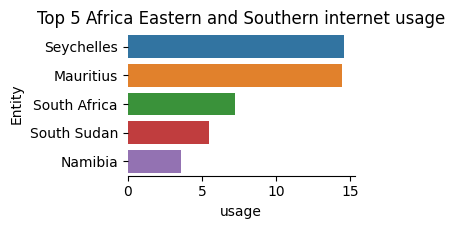

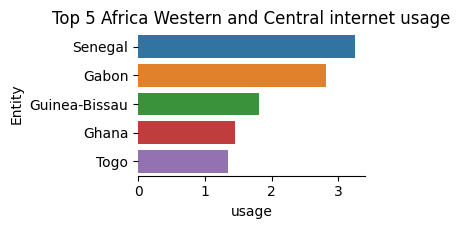

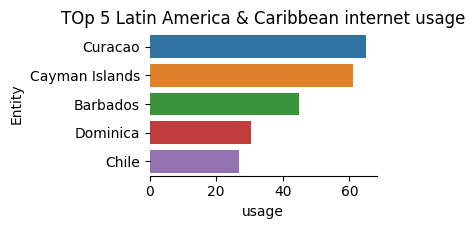

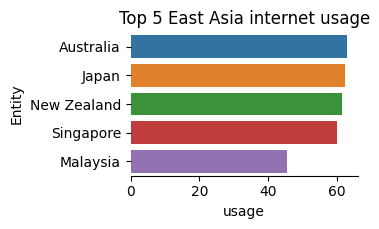

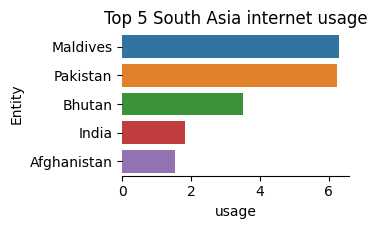

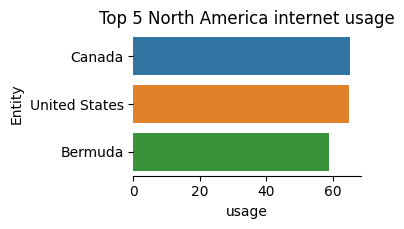

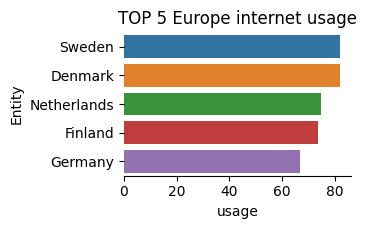

In [24]:

top5_graph(1, top5_africa_es_usage , 'Internet_Usage' , top5_africa_es_usage.index , 'Top 5 Africa Eastern and Southern internet usage' , 'usage')
top5_graph(2, top5_africa_wc_usage , 'Internet_Usage' , top5_africa_wc_usage.index , 'Top 5 Africa Western and Central internet usage' , 'usage')
top5_graph(3, top5_latam_car_usage , 'Internet_Usage' , top5_latam_car_usage.index , 'TOp 5 Latin America & Caribbean internet usage' , 'usage')
top5_graph(4, top5_east_asia_usage , 'Internet_Usage' , top5_east_asia_usage.index , 'Top 5 East Asia internet usage' , 'usage')
top5_graph(5, top5_south_asia_usage , 'Internet_Usage' , top5_south_asia_usage.index , 'Top 5 South Asia internet usage' , 'usage')
top5_graph(6, top5_n_america_usage , 'Internet_Usage' , top5_n_america_usage.index , 'Top 5 North America internet usage' , 'usage')
top5_graph(7, top5_eu_usage , 'Internet_Usage' , top5_eu_usage.index , 'TOP 5 Europe internet usage' , 'usage')


## 4. Create a visualization for those five regions' internet usage over time.

In [25]:
africa_es_internet

,Entity,Code,Year,Internet_Usage
167,Angola,AGO,1990,0.000000
168,Angola,AGO,1991,0.000000
169,Angola,AGO,1992,0.000000
170,Angola,AGO,1993,0.000000
171,Angola,AGO,1994,0.000000
...,...,...,...,...
7084,Zimbabwe,ZWE,2013,15.500000
7085,Zimbabwe,ZWE,2014,16.364740
7086,Zimbabwe,ZWE,2015,22.742818
7087,Zimbabwe,ZWE,2016,23.119989


In [32]:
import plotly.express as px

region_df_list = [africa_es_internet , africa_wc_internet, latam_car_internet, east_asia_internet, south_asia_internet, n_america_internet , eu_internet]
titles = ['Africa Eastern & Southern','Africa Western & Central', 'Latin America & Caribbean','East Asia internet usage' ,'South Asia internet' ,'North America' ,'Europe']
for df , title in zip(region_df_list ,titles):
    fig = px.line(df, x="Year", y="Internet_Usage", color='Entity' , title = title)
    fig.show()

## 5. What are the 5 countries with the most internet users?

In [37]:
noise = ['World', 'Asia', 'Upper-middle-income countries', 'Lower-middle-income countries', 'High-income countries', 'Europe', 'Africa', 'North America', 'Low-income countries', 'South America', 'Latin America and Caribbean', 'East Asia and Pacific', 'Europe and Central Asia', 'European Union', 'Low and middle income', 'Lower middle income', 'Low income','Middle East and North Africa', 'Middle income', 'Upper middle income', 'Central Europe and the Baltics','Europe & Central Asia (IDA & IBRD)', 'Europe & Central Asia (excluding high income)', 'European Union', 'Africa Eastern and Southern', 'Arab World', 'Central Europe and the Baltics', 'Caribbean Small States', 'Central Europe and the Baltics', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD)', 'East Asia & Pacific (excluding high income)','Europe & Central Asia (IDA & IBRD)','Europe & Central Asia (excluding high income)', 'Euro area', 'Europe & Central Asia'   ] # Collect noise

top5_world = people[(~people['Entity'].isin(noise)) & (people['Year'] == 2020)].sort_values(by='Users', ascending=False).head(5)
top5_world

,Entity,Code,Year,Users
1231,China,CHN,2020,1003218650
2699,India,IND,2020,600446441
6049,United States,USA,2020,305371298
834,Brazil,BRA,2020,173419624
2730,Indonesia,IDN,2020,146059763


In [52]:
fig = px.treemap(top5_world, path=[px.Constant('top 5 countries with the most internet users'), 'Entity', 'Users'], values='Users',
                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

## 6. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?

In [33]:
broadband

,Entity,Code,Year,Broadband_Subscriptions
0,Afghanistan,AFG,2004,0.000809
1,Afghanistan,AFG,2005,0.000858
2,Afghanistan,AFG,2006,0.001892
3,Afghanistan,AFG,2007,0.001845
4,Afghanistan,AFG,2008,0.001804
...,...,...,...,...
3883,Zimbabwe,ZWE,2016,1.217633
3884,Zimbabwe,ZWE,2017,1.315694
3885,Zimbabwe,ZWE,2018,1.406322
3886,Zimbabwe,ZWE,2019,1.395818


In [38]:
broadband_sub = broadband[(~broadband['Entity'].isin(noise)) & (broadband['Year'] == 2019)][['Entity','Broadband_Subscriptions']]
internet_usage_2019 = internet[(~internet['Entity'].isin(noise)) & (internet['Year'].isin([2019]))][['Entity','Internet_Usage']]